## **Imports**

In [1]:
import os
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## **Paths & Global Variables**

In [2]:
ROOT_PATH = r"C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic"

import sys

sys.path.append(ROOT_PATH)

from titanic.config import PROCESSED_DATA_DIR, MODELS_DIR

2025-02-20 00:41:06.349 | INFO     | titanic.config:<module>:9 - PROJ_ROOT path is: C:\Users\mario\OneDrive\Documents\Work\Side Hustles\Kaggle\titanic


## **Reading Data**

In [3]:
os.chdir(PROCESSED_DATA_DIR)

X_train = pd.read_parquet("X_train.parquet")
y_train = pd.read_parquet("y_train.parquet")

X_test = pd.read_parquet("X_test.parquet")
y_test = pd.read_parquet("y_test.parquet")

# **Logistic Regression**

In [4]:
log_reg = LogisticRegression()

# finds the coefficients and the intercept value
log_reg.fit(X_train, y_train)

c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\mario\AppData\Local\Temp\ipykernel_22672\2882998531.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Coefficient', ylabel='Feature'>

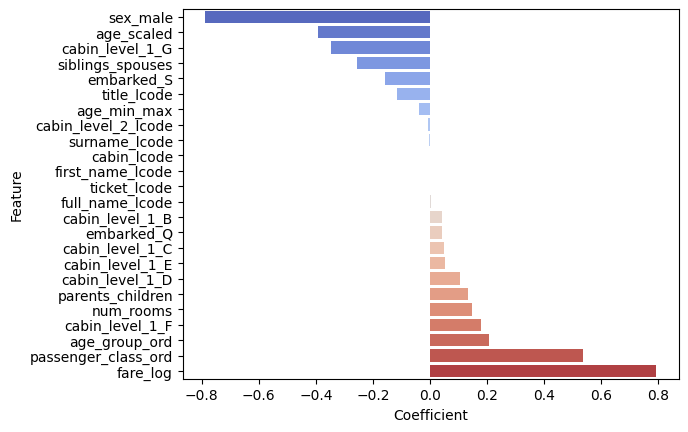

In [5]:
coefficients_df = pd.DataFrame(
    {"Feature": log_reg.feature_names_in_, "Coefficient": log_reg.coef_.flatten()}
)

sns.barplot(
    x="Coefficient",
    y="Feature",
    data=coefficients_df.sort_values("Coefficient"),
    palette="coolwarm",
)